In [1]:
#importing important library 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier,  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data set
df = pd.read_csv("Data_new.csv")
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [3]:
df.drop("ID", axis = 1, inplace = True)
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [4]:
df.shape

(1518, 7)

In [5]:
df = df.drop_duplicates()
df.shape

(986, 7)

In [6]:
df.isna().sum() #there is no NAN value

Age             0
Gender          0
Occupation      0
Phone Type      0
Current Bike    0
Relationship    0
Response        0
dtype: int64

In [7]:
df.dtypes

Age              int64
Gender          object
Occupation      object
Phone Type      object
Current Bike    object
Relationship    object
Response        object
dtype: object

In [8]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i])
df

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,1,0,0,1,1,0
1,27,0,1,2,4,3,1
2,39,0,3,0,1,2,0
3,20,0,3,1,4,2,0
4,29,1,2,0,1,1,1
...,...,...,...,...,...,...,...
995,56,1,1,1,0,2,0
996,51,1,2,0,4,2,0
997,55,0,1,1,0,3,0
998,45,1,0,1,2,0,0


In [9]:
x = df.drop("Response",axis=1)
x

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship
0,53,1,0,0,1,1
1,27,0,1,2,4,3
2,39,0,3,0,1,2
3,20,0,3,1,4,2
4,29,1,2,0,1,1
...,...,...,...,...,...,...
995,56,1,1,1,0,2
996,51,1,2,0,4,2
997,55,0,1,1,0,3
998,45,1,0,1,2,0


In [10]:
y = df[["Response"]]
y

,Response
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,0


In [11]:
# performing train and test split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=50)

# Logistic Regression

In [12]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
accuracy_score(y_test,lr_pred)


0.6363636363636364

# DecisionTree

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
accuracy_score(y_test,dt_pred)

0.696969696969697

# Random Forest Classifier

In [14]:
classifier = RandomForestClassifier(n_estimators = 10, random_state = 50)
classifier.fit(x_train, y_train)
y_reg_pred = classifier.predict(x_test)
accuracy_score(y_test,y_reg_pred)

0.6464646464646465

# Adaboost 

In [15]:
adboost = AdaBoostClassifier()
adboost.fit(x_train,y_train)
y_adboost_pred = adboost.predict(x_test)
accuracy_score(y_test,y_adboost_pred)

0.6262626262626263

# KNN model

In [16]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_score(y_test,knn_pred)

0.6111111111111112

In [17]:
err_rate = []
for k in range(1,40): #(1,40) is a k value ranges between the 1 to 40 beacuse from error rate we changing k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    err_rate.append(1-accuracy_score(y_test, knn_pred))
err_rate

[0.4040404040404041,
 0.41414141414141414,
 0.36868686868686873,
 0.38888888888888884,
 0.38888888888888884,
 0.38383838383838387,
 0.3939393939393939,
 0.38888888888888884,
 0.398989898989899,
 0.36363636363636365,
 0.36363636363636365,
 0.35858585858585856,
 0.3434343434343434,
 0.38888888888888884,
 0.38383838383838387,
 0.36868686868686873,
 0.36363636363636365,
 0.3484848484848485,
 0.3737373737373737,
 0.36363636363636365,
 0.36363636363636365,
 0.3737373737373737,
 0.35858585858585856,
 0.36363636363636365,
 0.38383838383838387,
 0.3737373737373737,
 0.36868686868686873,
 0.35858585858585856,
 0.36868686868686873,
 0.3535353535353535,
 0.3535353535353535,
 0.36363636363636365,
 0.36363636363636365,
 0.3737373737373737,
 0.38888888888888884,
 0.38383838383838387,
 0.38888888888888884,
 0.3787878787878788,
 0.3737373737373737]

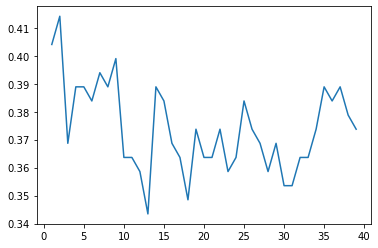

In [18]:
plt.plot(range(1,40),err_rate)

# Gboost

In [19]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train,y_train)
y_gradient_pred = gradient.predict(x_test)
accuracy_score(y_test,y_gradient_pred)

0.6161616161616161

# SVM

In [20]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
accuracy_score(y_test,svc_pred)

0.6161616161616161

In [21]:
score = cross_val_score(svc,x,y,cv=5)
score

array([0.6010101 , 0.64467005, 0.64467005, 0.64467005, 0.64467005])

In [22]:
np.mean(score)

0.6359380608111573